In [26]:
#| echo: true
#| message: false
#| code-fold: true
#| code-summary: "Libraries"

library(tidyverse)
library(ggplot2)
library(forecast)
library(astsa) 
library(xts)
library(tseries)
library(fpp2)
library(fma)
library(lubridate)
library(tidyverse)
library(TSstudio)
library(quantmod)
library(tidyquant)
library(plotly)
library(ggplot2)
library(gridExtra)
library(readxl)
library(imputeTS)

#### [Global Oil Production](https://ourworldindata.org/grapher/oil-production-by-country?time=earliest..1923)

Rows: 1675 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (2): Country, Code
dbl (2): Year, Oil_production_TWh



i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


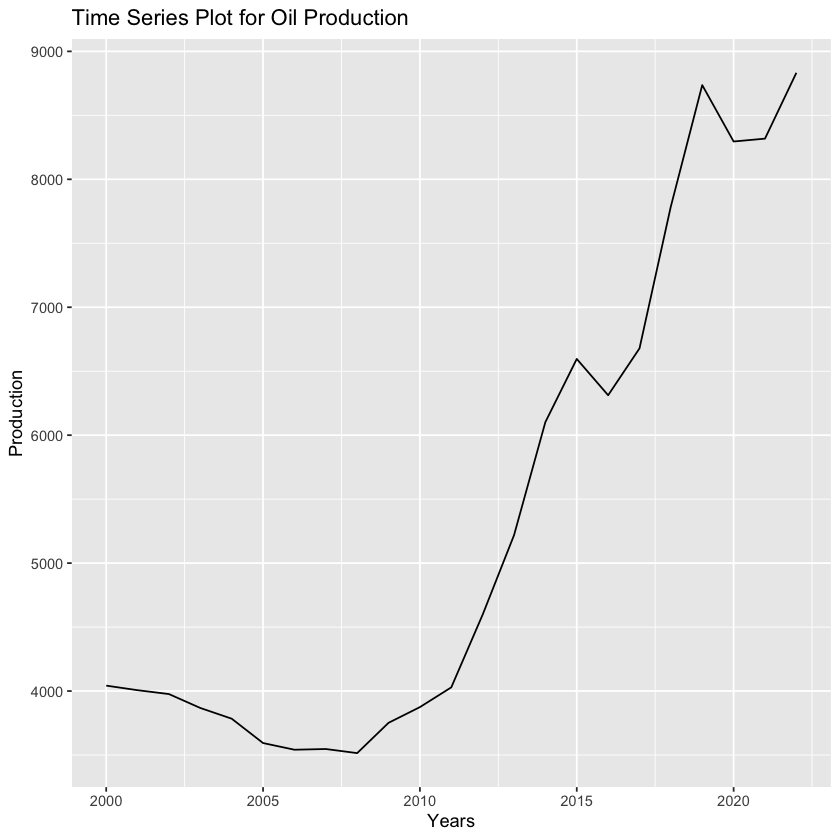

In [27]:
#| echo: true
#| message: false
#| code-fold: true
#| code-summary: "Libraries"
#| warning: false

par(bg = "white")

# Import dataset
df_oil_production <- read_csv('./data/viz_oil-production-by-country.csv')

# Filter information
df_oil_production <- df_oil_production %>% filter(Country == 'United States' & Year >= 2000)

# Check for missing values
# is.na(df_oil_production)

# Create time series
ts_oil_production<-ts(df_oil_production$Oil_production_TWh,star=decimal_date(as.Date("2000-01-01",format = "%Y-%m-%d")),frequency = 1)

# Create time series plot
#ts_plot_oil_production <- plot(as.ts(ts_oil_production), main = "Oil Production Time Series", xlab = "Years", ylab = "Production")

# Show the customized plot
#ggplotly(ts_plot_oil_production)

ggplot(df_oil_production, aes(x = Year, y = Oil_production_TWh)) +
  geom_line() + # Use geom_line() for a time series plot
  labs(
    title = "Time Series Plot for Oil Production",
    x = "Years",
    y = "Production"
  )

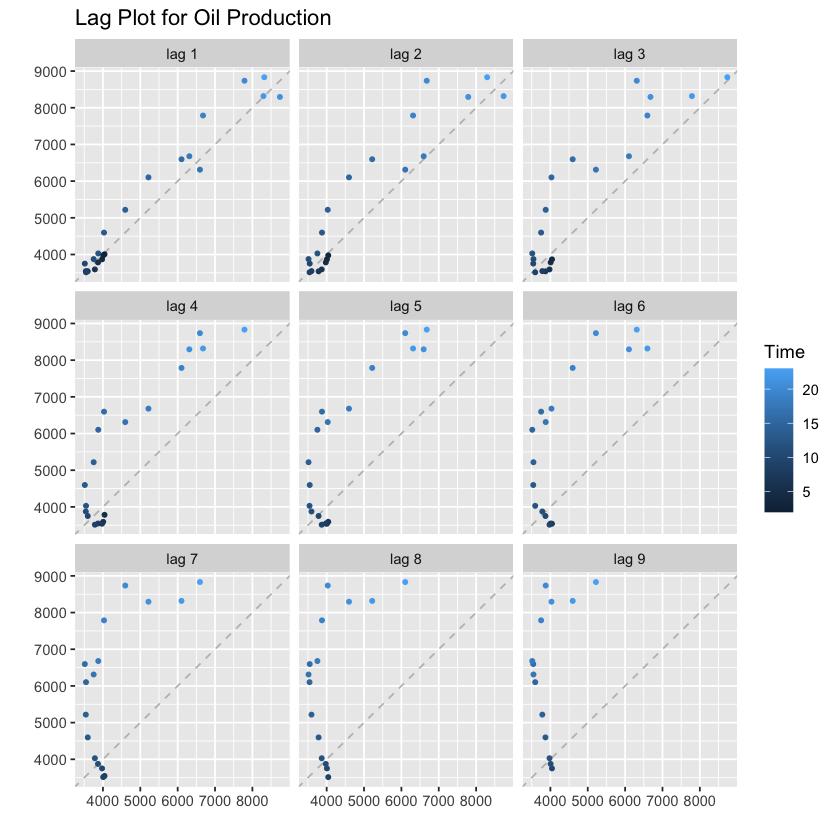

In [28]:
gglagplot(ts_oil_production, do.lines=FALSE)+ggtitle("Lag Plot for Oil Production")

Warning message in ggplot2::geom_segment(lineend = "butt", ...):
"Ignoring unknown parameters: `main`"


Warning message in ggplot2::geom_segment(lineend = "butt", ...):
"Ignoring unknown parameters: `main`"


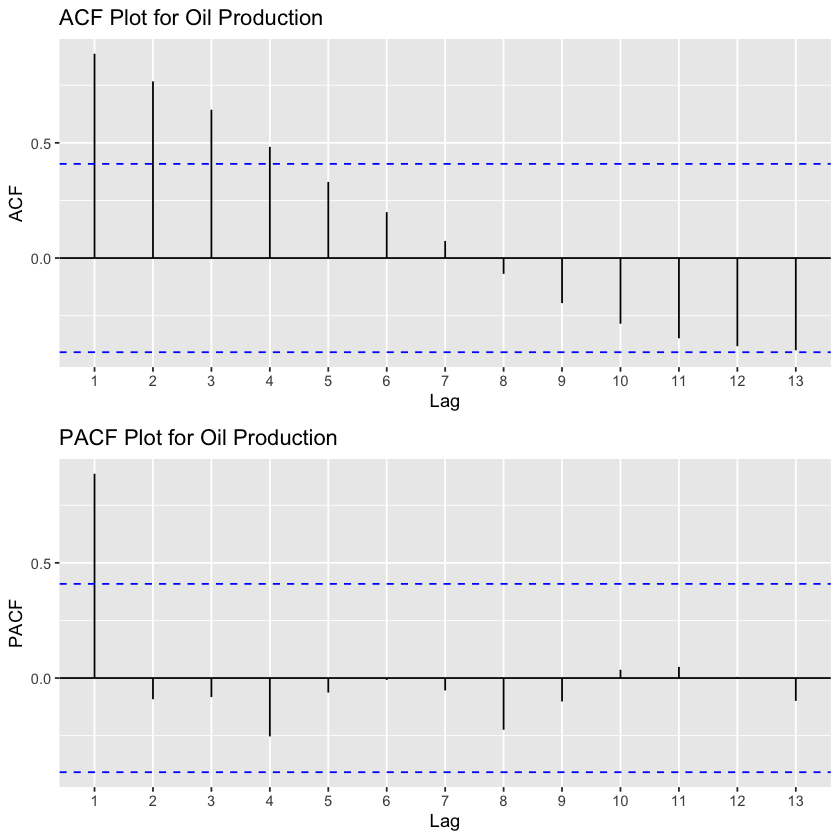

In [29]:
par(bg = "white")

acf_oil_production <- ggAcf(ts_oil_production, main="ACF Plot for Oil Production")
pacf_oil_production <- ggPacf(ts_oil_production, main="PACF Plot for Oil Production")


grid.arrange(acf_oil_production, pacf_oil_production, nrow=2)

In [30]:
test_oil_production <- adf.test(ts_oil_production)
print(test_oil_production)


	Augmented Dickey-Fuller Test

data:  ts_oil_production
Dickey-Fuller = -1.9847, Lag order = 2, p-value = 0.5782
alternative hypothesis: stationary



Warning message in ggplot2::geom_segment(lineend = "butt", ...):
"Ignoring unknown parameters: `main`"
Warning message in ggplot2::geom_segment(lineend = "butt", ...):
"Ignoring unknown parameters: `main`"


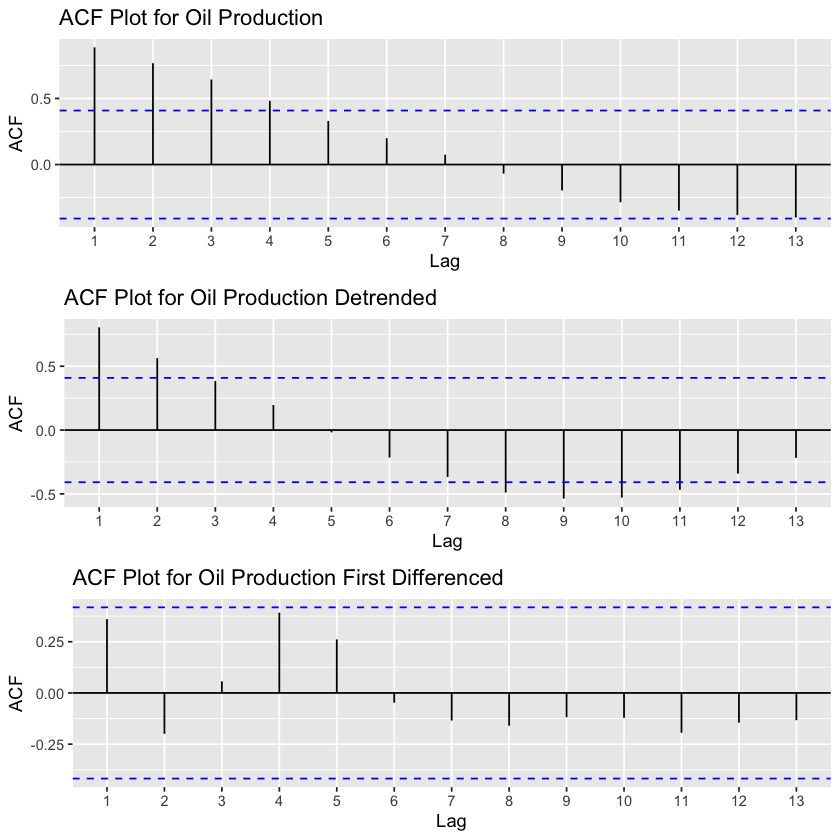

In [31]:
par(bg = "white")

# Create fit data
fit_oil_production <- lm(ts_oil_production~time(ts_oil_production), na.action=NULL) 

# ACF Detrended Plot
acf_2_oil_production <- ggAcf(resid(fit_oil_production), main="ACF Plot for Oil Production Detrended")

# ACF Differenced Plot
acf_3_oil_production <- ggAcf(diff(ts_oil_production), main="ACF Plot for Oil Production First Differenced")

# Arrange Plots
grid.arrange(acf_oil_production, acf_2_oil_production, acf_3_oil_production, nrow=3)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Warning message:
"Removed 4 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 10 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 14 rows containing missing values (`geom_line()`)."


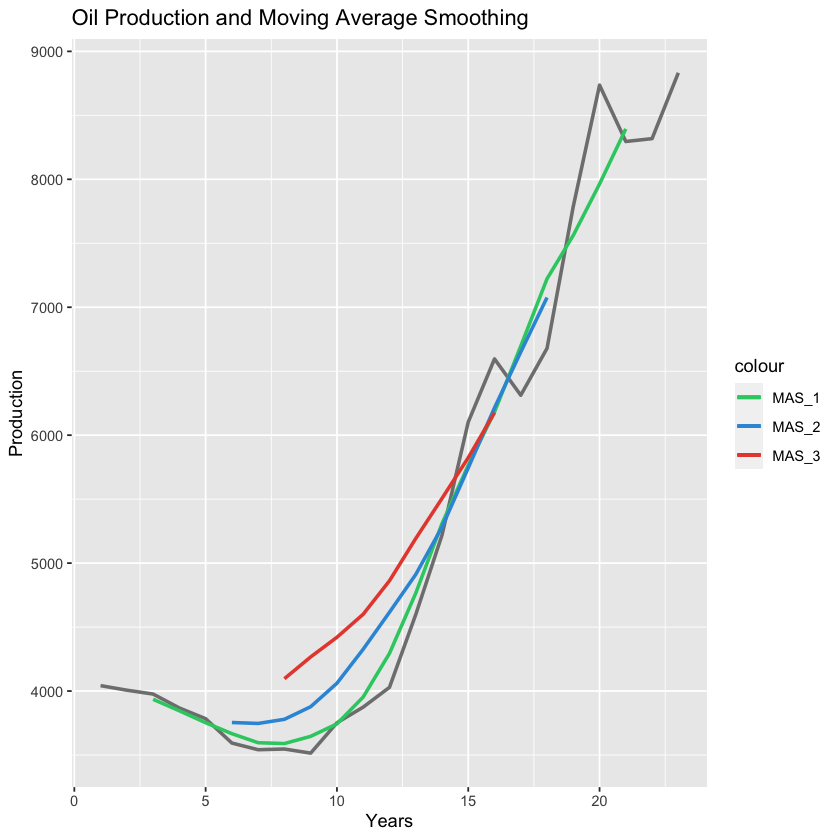

In [32]:
mas_1_oil_production <- ma(ts_oil_production, order = 5)
mas_2_oil_production <- ma(ts_oil_production, order = 10)
mas_3_oil_production <- ma(ts_oil_production, order = 15)

ggplot() +
  geom_line(aes(x = 1:length(ts_oil_production), y = ts_oil_production, color = "Original"), size = 1) +
  geom_line(aes(x = 1:length(mas_1_oil_production), y = mas_1_oil_production, color = "MAS_1"), size = 1) +
  geom_line(aes(x = 1:length(mas_2_oil_production), y = mas_2_oil_production, color = "MAS_2"), size = 1) +
  geom_line(aes(x = 1:length(mas_3_oil_production), y = mas_3_oil_production, color = "MAS_3"), size = 1) +
  scale_color_manual(values = c("Oil Production" = "black", "MAS_1" = "#2ECC71", "MAS_2" = "#3498DB", "MAS_3" = "#E74C3C")) +
  labs(title = "Oil Production and Moving Average Smoothing", x = "Years", y = "Production")

In [33]:
write.csv(ts_oil_production, './data/ts_oil_production.csv', row.names = FALSE)

#### [U.S. Inflation Rate](https://data.oecd.org/price/inflation-cpi.htm)

#### [Crude Oil Price](https://finance.yahoo.com/quote/CL%3DF/chart?p=CL%3DF#eyJpbnRlcnZhbCI6IndlZWsiLCJwZXJpb2RpY2l0eSI6MSwiY2FuZGxlV2lkdGgiOjEsImZsaXBwZWQiOmZhbHNlLCJ2b2x1bWVVbmRlcmxheSI6dHJ1ZSwiYWRqIjp0cnVlLCJjcm9zc2hhaXIiOnRydWUsImNoYXJ0VHlwZSI6ImxpbmUiLCJleHRlbmRlZCI6ZmFsc2UsIm1hcmtldFNlc3Npb25zIjp7fSwiYWdncmVnYXRpb25UeXBlIjoib2hsYyIsImNoYXJ0U2NhbGUiOiJsaW5lYXIiLCJwYW5lbHMiOnsiY2hhcnQiOnsicGVyY2VudCI6MSwiZGlzcGxheSI6IkNMPUYiLCJjaGFydE5hbWUiOiJjaGFydCIsImluZGV4IjowLCJ5QXhpcyI6eyJuYW1lIjoiY2hhcnQiLCJwb3NpdGlvbiI6bnVsbH0sInlheGlzTEhTIjpbXSwieWF4aXNSSFMiOlsiY2hhcnQiLCLigIx2b2wgdW5kcuKAjCJdfX0sInNldFNwYW4iOnsiYmFzZSI6ImFsbCIsIm11bHRpcGxpZXIiOjF9LCJsaW5lV2lkdGgiOjIsInN0cmlwZWRCYWNrZ3JvdW5kIjp0cnVlLCJldmVudHMiOnRydWUsImNvbG9yIjoiIzAwODFmMiIsInN0cmlwZWRCYWNrZ3JvdWQiOnRydWUsImV2ZW50TWFwIjp7ImNvcnBvcmF0ZSI6eyJkaXZzIjp0cnVlLCJzcGxpdHMiOnRydWV9LCJzaWdEZXYiOnt9fSwiY3VzdG9tUmFuZ2UiOm51bGwsInN5bWJvbHMiOlt7InN5bWJvbCI6IkNMPUYiLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiQ0w9RiIsInF1b3RlVHlwZSI6IkZVVFVSRSIsImV4Y2hhbmdlVGltZVpvbmUiOiJBbWVyaWNhL05ld19Zb3JrIn0sInBlcmlvZGljaXR5IjoxLCJpbnRlcnZhbCI6IndlZWsiLCJzZXRTcGFuIjp7ImJhc2UiOiJhbGwiLCJtdWx0aXBsaWVyIjoxfX1dLCJzdHVkaWVzIjp7IuKAjHZvbCB1bmRy4oCMIjp7InR5cGUiOiJ2b2wgdW5kciIsImlucHV0cyI6eyJpZCI6IuKAjHZvbCB1bmRy4oCMIiwiZGlzcGxheSI6IuKAjHZvbCB1bmRy4oCMIn0sIm91dHB1dHMiOnsiVXAgVm9sdW1lIjoiIzAwYjA2MSIsIkRvd24gVm9sdW1lIjoiI2ZmMzMzYSJ9LCJwYW5lbCI6ImNoYXJ0IiwicGFyYW1ldGVycyI6eyJ3aWR0aEZhY3RvciI6MC40NSwiY2hhcnROYW1lIjoiY2hhcnQiLCJwYW5lbE5hbWUiOiJjaGFydCJ9fX19)

In [36]:
#| echo: true
#| message: false
#| code-fold: true
#| code-summary: "Libraries"
#| warning: false

par(bg = "white")

# Import dataset
df_oil_price <- read_csv('./data/viz_oil_price.csv')

# Select relevant columns
df_oil_price <- df_oil_price %>% select('date', 'adjusted')

# Create a sequence of dates from start_date to end_date
start_date <- as.Date(min(df_oil_price$date))  
end_date <- as.Date(max(df_oil_price$date))    

# Create data range
date_range <- seq(start_date, end_date, by = "1 day")

# Create a dataset with the date range
date_dataset <- data.frame(Date = date_range)

# Merge dataframes
df_oil_price <- merge(df_oil_price, date_dataset, by.x = "date", by.y = "Date", all = TRUE)

# Check for missing values
# is.na(df_oil_price$adjusted)

# Extract rows with missing values
df_na_rows <- df_oil_price[which(rowSums(is.na(df_oil_price)) > 0),]

# Extract columns with missing values
df_na_cols <- df_oil_price[, which(colSums(is.na(df_oil_price)) > 0)]

# Modify data
imputed_time_series <- na_ma(df_oil_price, k = 4, weighting = "exponential")

# Add modified data
df_oil_price <- data.frame(imputed_time_series)

# Change data type
df_oil_price$date <- as.Date(df_oil_price$date,format = "%m/%d/%y")

# Create time series
ts_oil_price<-ts(df_oil_price$adjusted,star=decimal_date(as.Date("2000-08-23",format = "%Y-%m-%d")),frequency = 365.25)

# Create time series plot
# ts_oil_price <- plot(as.ts(ts_oil_price), main = "Oil Price Time Series", xlab = "Years", ylab = "Price")

# Show the customized plot
# ggplotly(ts_oil_price)

Rows: 5690 Columns: 9
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (1): symbol
dbl  (7): open, high, low, close, volume, adjusted, rownames.oil_price.
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Warning message:
"Removed 30 rows containing missing values (`geom_line()`)."


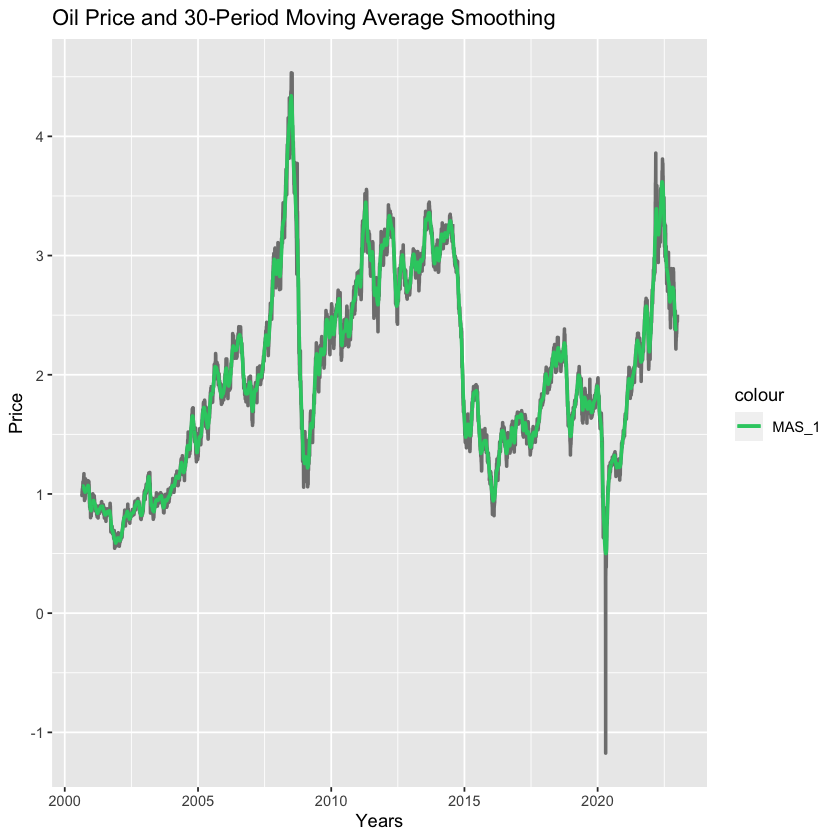

In [45]:
ts_oil_price <- ts(ts_oil_price,star=decimal_date(as.Date("2000-08-23",format = "%Y-%m-%d")),frequency = 365.25)

date_seq <- seq(as.Date("2000-08-23"), length.out = length(ts_oil_price), by = "days")

# Moving Average Smoothing - small number
mas_1_oil_price <- ma(ts_oil_price, order = 30)

mas_1_oil_price <- ts(mas_1_oil_price,star=decimal_date(as.Date("2000-08-23",format = "%Y-%m-%d")),frequency = 365.25)

# Plot the Time Series and the Moving Average Smoothing curves
mas_1_plot <- ggplot() +
              geom_line(aes(x = date_seq, y = as.ts(ts_oil_price), color = "Original"), size = 1) +
              geom_line(aes(x = date_seq, y = as.ts(mas_1_oil_price), color = "MAS_1"), size = 1) +
              scale_color_manual(values = c("Oil Price" = "black", "MAS_1" = "#2ECC71")) +
              labs(title = "Oil Price and 30-Period Moving Average Smoothing", x = "Years", y = "Price")

mas_1_plot

#### [U.S. Inflation Rate](https://data.oecd.org/price/inflation-cpi.htm)

``` {r}
#| echo: true
#| message: false
#| code-fold: true
#| code-summary: "Time Series Plot"
#| warning: false


```

> Insert TS Plot Code

> Describe trend

> Insert Lag Plot Code

> Describe Lags

> Insert Decomposing Code 

> Describe Decomposing

> ACF Plot Code

> PACF Plot Code

> Describe Autocorrelation

> Describe Stationarity

> Augmented Dickey-Fuller Test Code

> Describe Results obtained

> Convert to Stationary

> Explain